In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = pd.read_csv("Fifa 23 Players Data.csv", delimiter= ",")
df.head()

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21


In [3]:
features = ["Overall", "Potential", "Value(in Euro)","Age", "Height(in cm)", "Weight(in kg)", "TotalStats", "BaseStats"]
df = df.dropna(subset=features)
data = df[features].copy()
data.head()

,Overall,Potential,Value(in Euro),Age,Height(in cm),Weight(in kg),TotalStats,BaseStats
0,91,91,54000000,35,169,67,2190,452
1,91,91,64000000,34,185,81,2147,455
2,91,91,84000000,33,185,81,2205,458
3,91,91,107500000,31,181,70,2303,483
4,91,95,190500000,23,182,73,2177,470


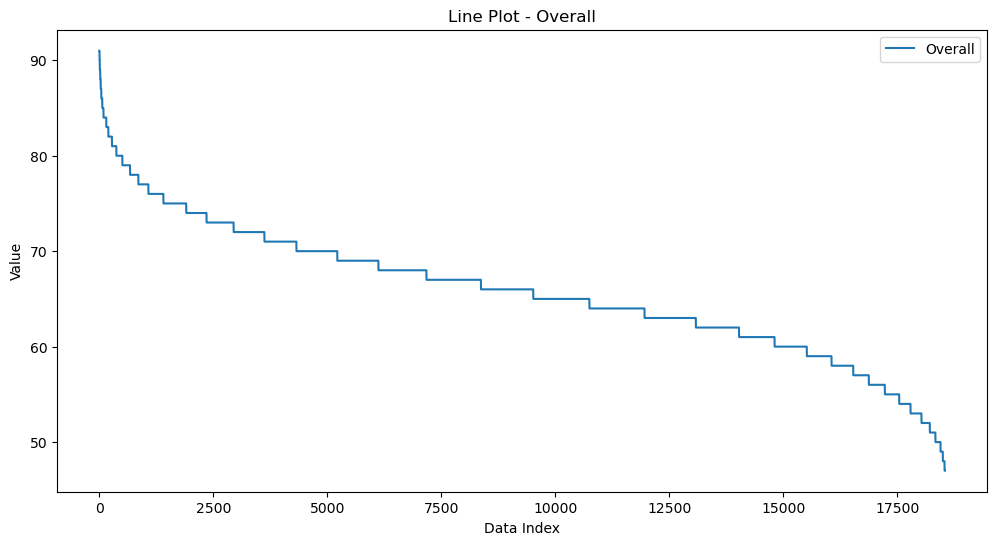

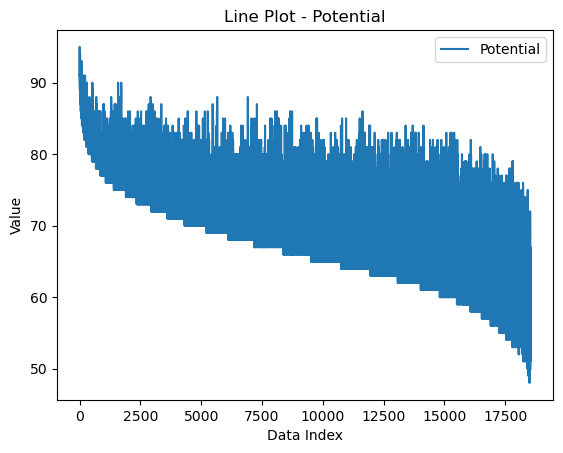

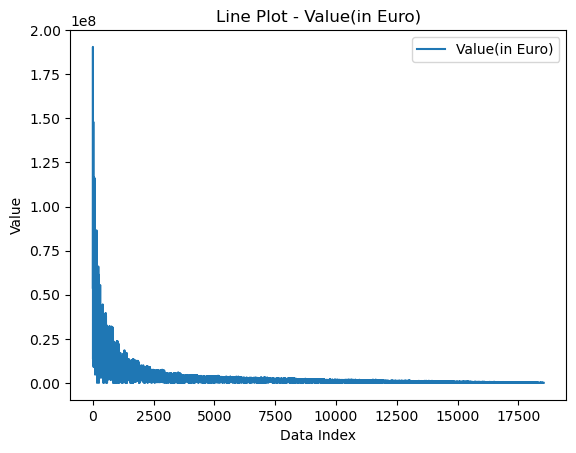

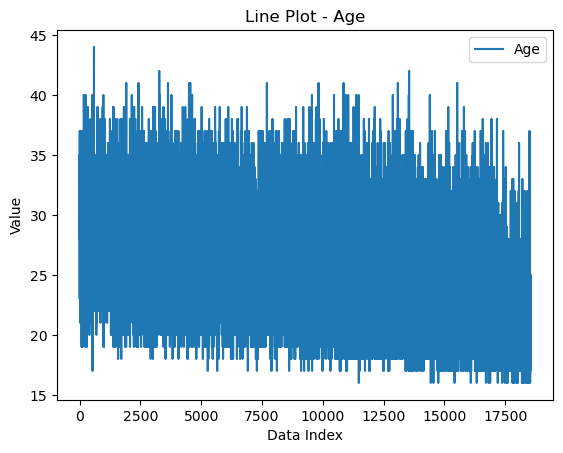

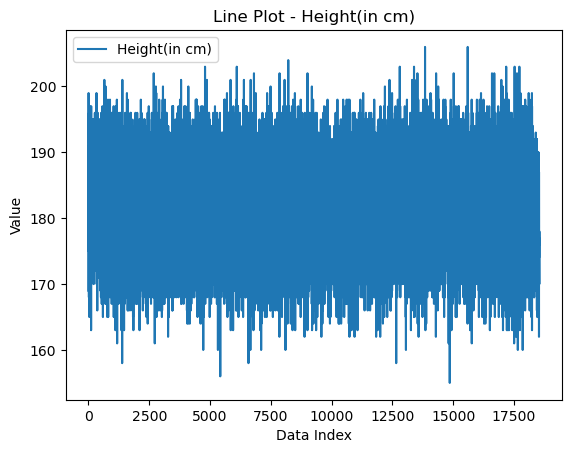

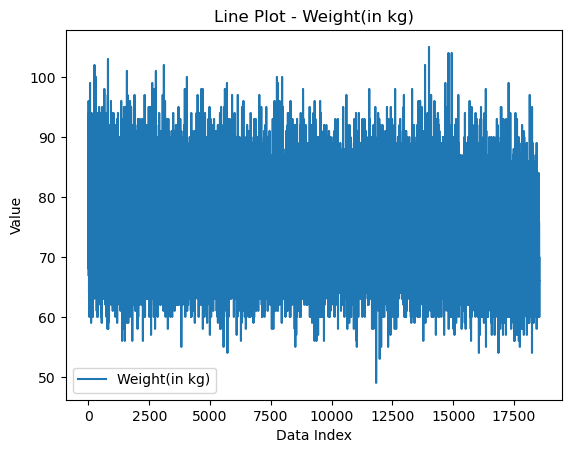

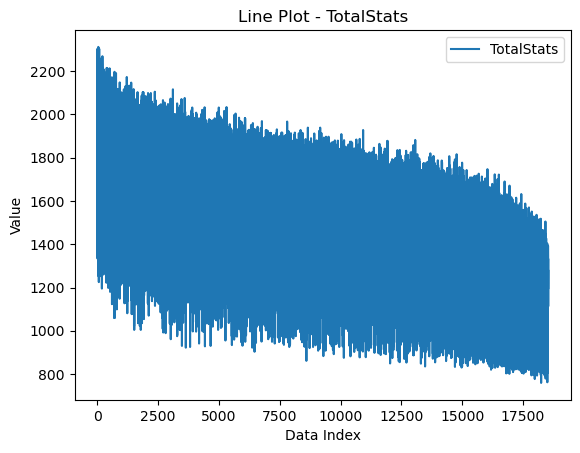

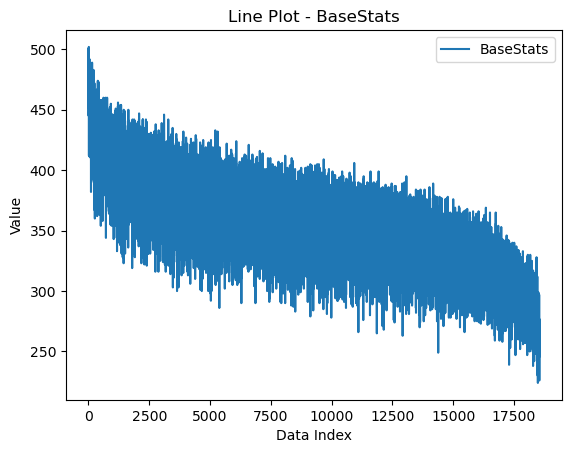

In [4]:
# Visualisasi Line Plot
plt.figure(figsize=(12, 6))
for column in data.columns:
    plt.plot(data[column], label=column)
    plt.xlabel('Data Index')
    plt.ylabel('Value')
    plt.title('Line Plot - {}'.format(column))
    plt.legend()
    plt.show()

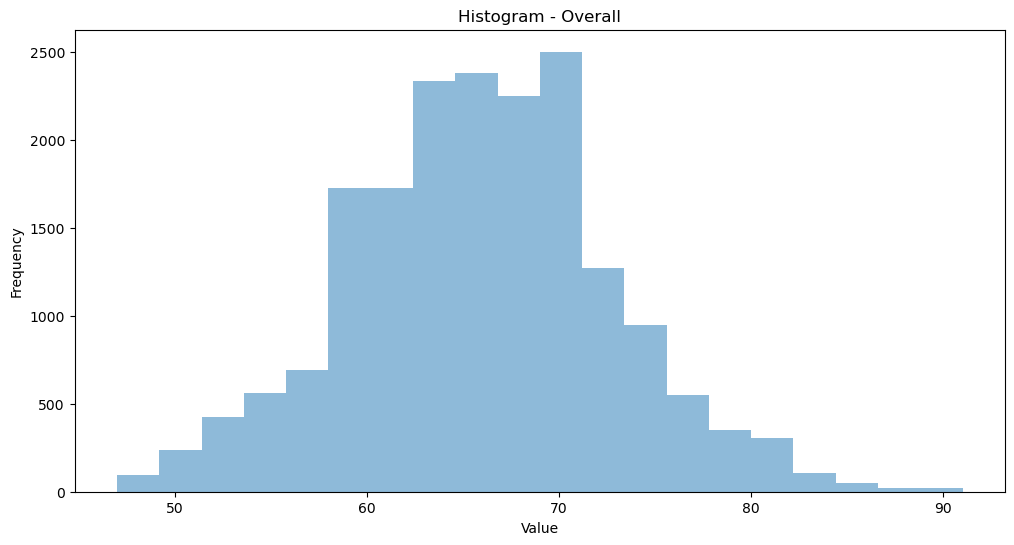

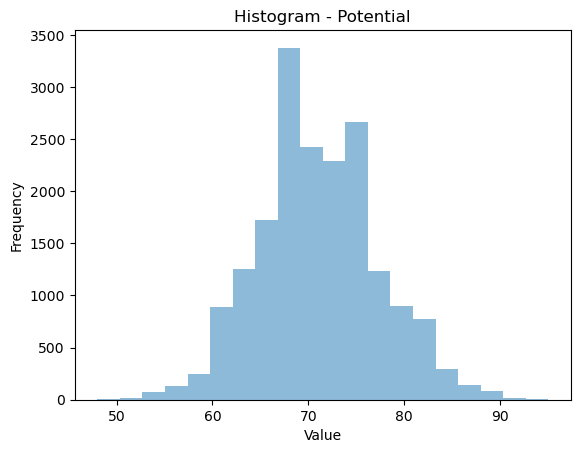

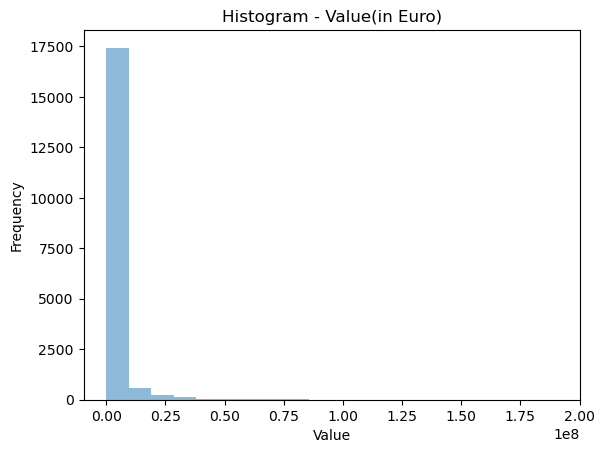

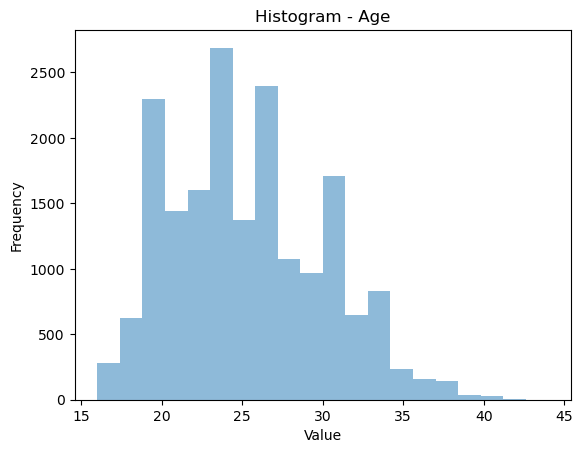

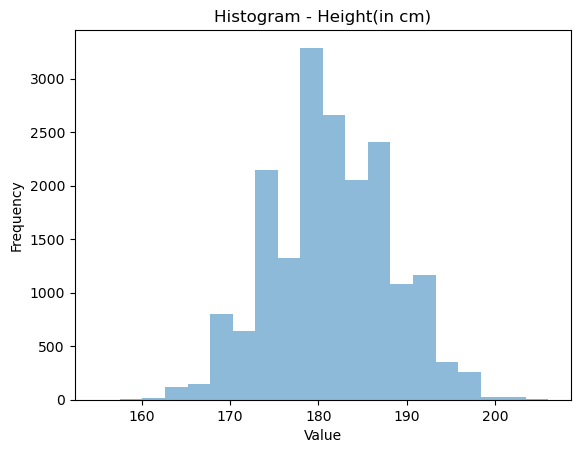

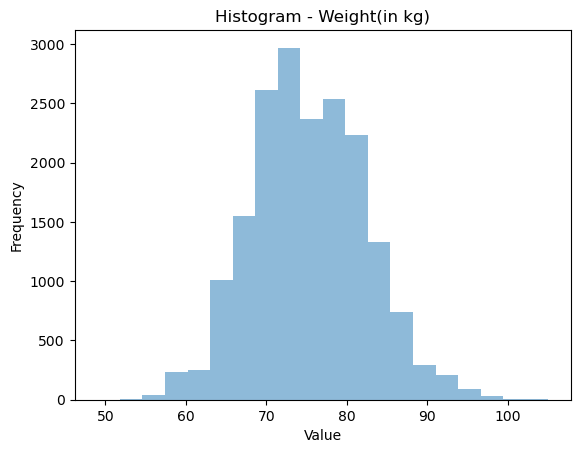

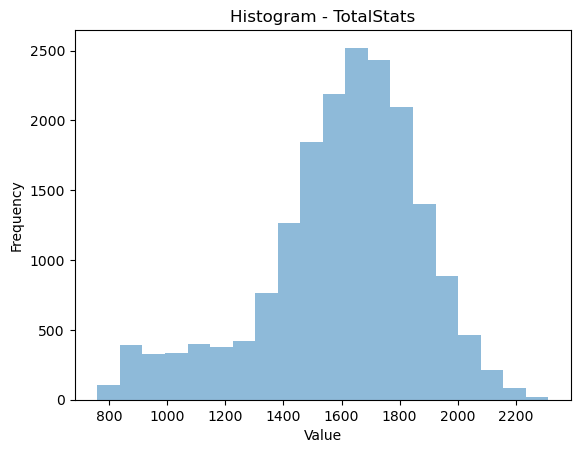

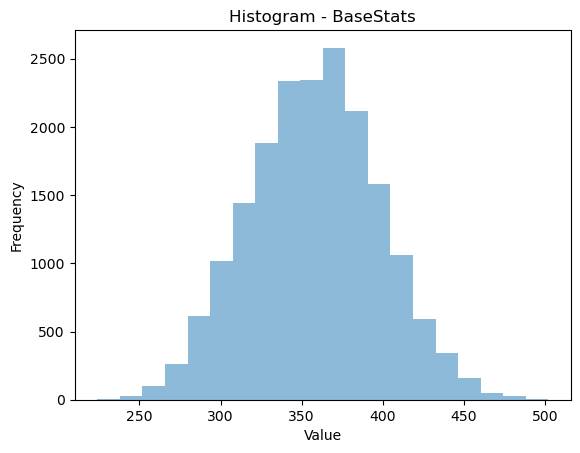

In [5]:
# Visualisasi Histogram
plt.figure(figsize=(12, 6))
for column in data.columns:
    plt.hist(data[column], bins=20, alpha=0.5)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Histogram - {}'.format(column))
    plt.show()

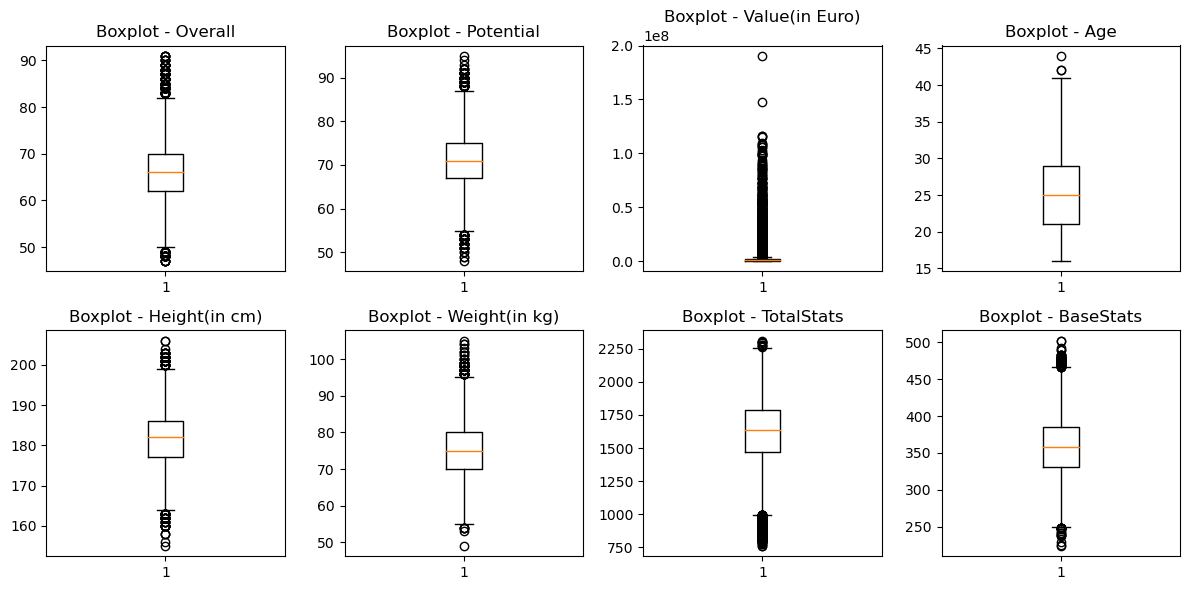

In [6]:
# Visualisasi Boxplot untuk setiap variabel
plt.figure(figsize=(12, 6))
for i, column in enumerate(data.columns):
    plt.subplot(2, 4, i+1)
    plt.boxplot(data[column])
    plt.title('Boxplot - {}'.format(column))
plt.tight_layout()
plt.show()

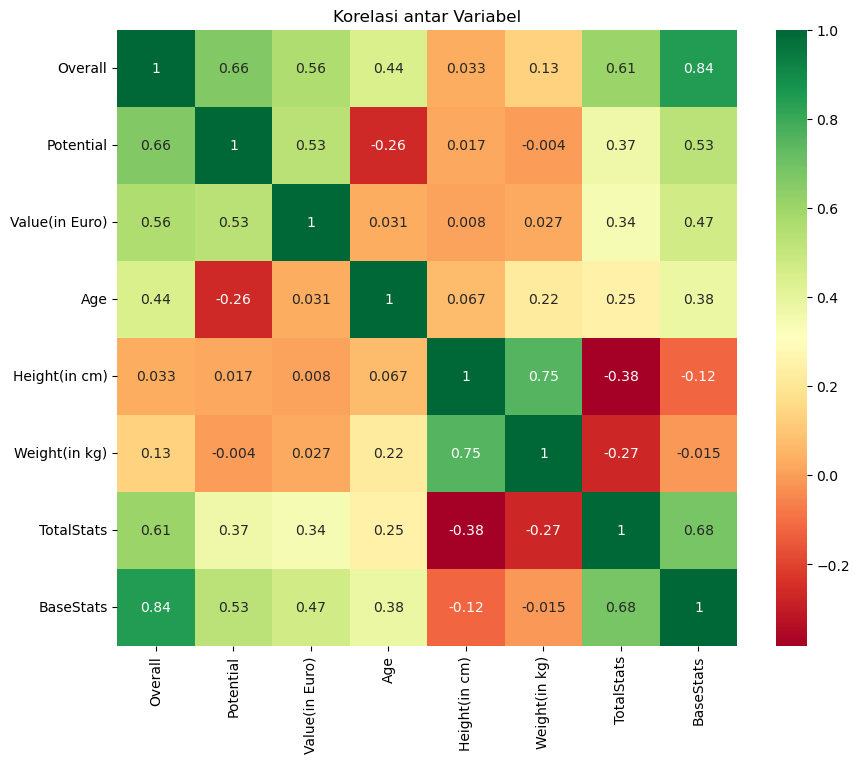

In [7]:
# Menghitung koefisien korelasi menggunakan metode Pearson
correlation_matrix = data.corr()

# Menampilkan heatmap matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn')
plt.title('Korelasi antar Variabel')
plt.show()

Regression results for variable: Potential
                                 OLS Regression Results                                
Dep. Variable:                Overall   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                          2.932e+06
Date:                Sat, 17 Jun 2023   Prob (F-statistic):                        0.00
Time:                        18:41:56   Log-Likelihood:                         -57040.
No. Observations:               18539   AIC:                                  1.141e+05
Df Residuals:                   18538   BIC:                                  1.141e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975

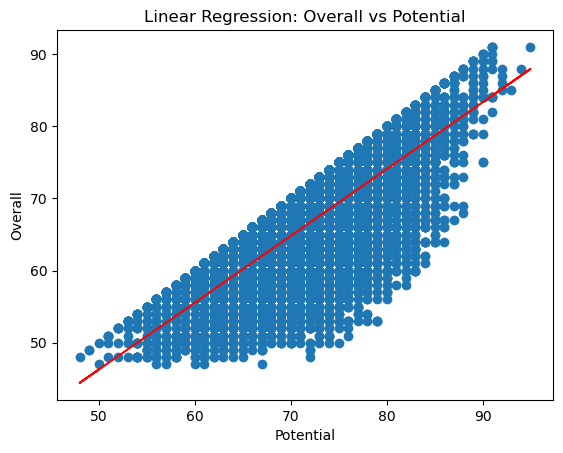

Hypothesis testing for coefficient:
H0: The coefficient is zero (No relationship)
H1: The coefficient is not zero (There is a relationship)
p-value: 0.0
Conclusion: Reject the null hypothesis. There is a significant relationship.
------------------------------------------
Regression results for variable: Value(in Euro)
                                 OLS Regression Results                                
Dep. Variable:                Overall   R-squared (uncentered):                   0.164
Model:                            OLS   Adj. R-squared (uncentered):              0.164
Method:                 Least Squares   F-statistic:                              3626.
Date:                Sat, 17 Jun 2023   Prob (F-statistic):                        0.00
Time:                        18:41:56   Log-Likelihood:                     -1.0238e+05
No. Observations:               18539   AIC:                                  2.048e+05
Df Residuals:                   18538   BIC:                   

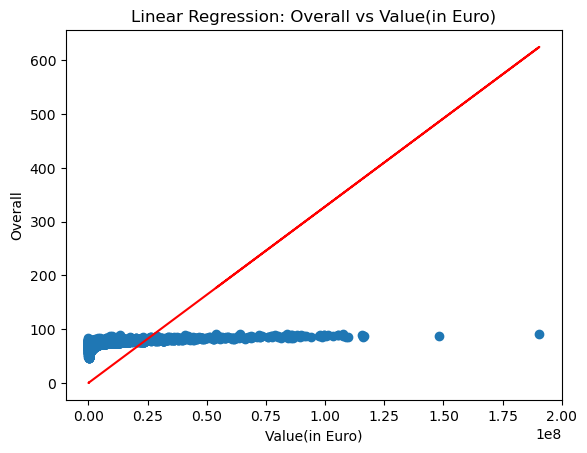

Hypothesis testing for coefficient:
H0: The coefficient is zero (No relationship)
H1: The coefficient is not zero (There is a relationship)
p-value: 0.0
Conclusion: Reject the null hypothesis. There is a significant relationship.
------------------------------------------
Regression results for variable: Age
                                 OLS Regression Results                                
Dep. Variable:                Overall   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                          6.543e+05
Date:                Sat, 17 Jun 2023   Prob (F-statistic):                        0.00
Time:                        18:41:56   Log-Likelihood:                         -70741.
No. Observations:               18539   AIC:                                  1.415e+05
Df Residuals:                   18538   BIC:                              

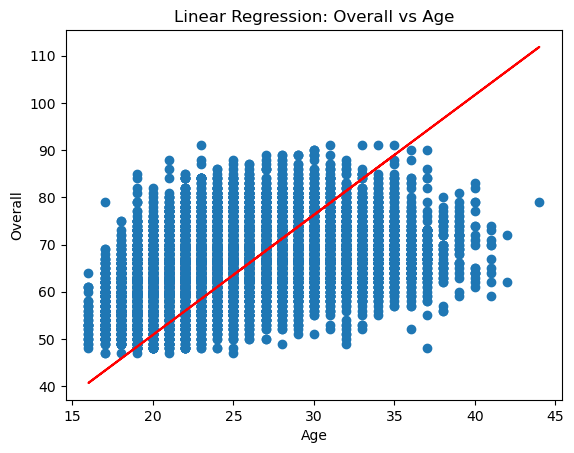

Hypothesis testing for coefficient:
H0: The coefficient is zero (No relationship)
H1: The coefficient is not zero (There is a relationship)
p-value: 0.0
Conclusion: Reject the null hypothesis. There is a significant relationship.
------------------------------------------
Regression results for variable: Height(in cm)
                                 OLS Regression Results                                
Dep. Variable:                Overall   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                          1.570e+06
Date:                Sat, 17 Jun 2023   Prob (F-statistic):                        0.00
Time:                        18:41:57   Log-Likelihood:                         -62777.
No. Observations:               18539   AIC:                                  1.256e+05
Df Residuals:                   18538   BIC:                    

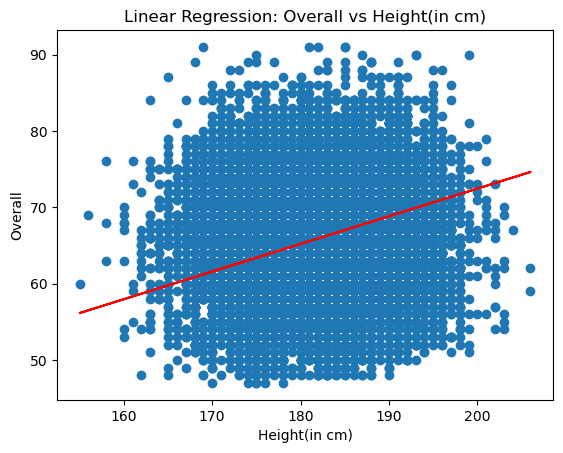

Hypothesis testing for coefficient:
H0: The coefficient is zero (No relationship)
H1: The coefficient is not zero (There is a relationship)
p-value: 0.0
Conclusion: Reject the null hypothesis. There is a significant relationship.
------------------------------------------
Regression results for variable: Weight(in kg)
                                 OLS Regression Results                                
Dep. Variable:                Overall   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                          1.100e+06
Date:                Sat, 17 Jun 2023   Prob (F-statistic):                        0.00
Time:                        18:41:57   Log-Likelihood:                         -66028.
No. Observations:               18539   AIC:                                  1.321e+05
Df Residuals:                   18538   BIC:                    

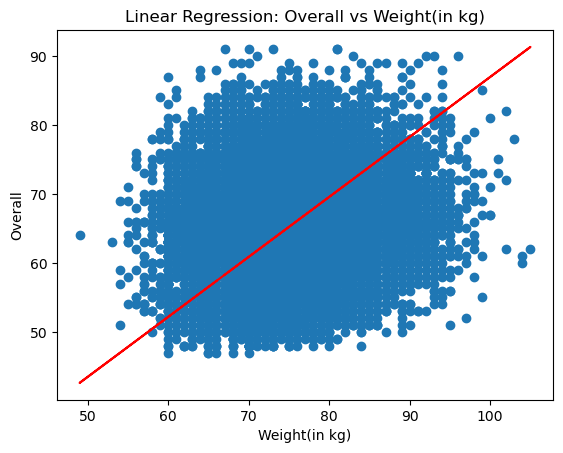

Hypothesis testing for coefficient:
H0: The coefficient is zero (No relationship)
H1: The coefficient is not zero (There is a relationship)
p-value: 0.0
Conclusion: Reject the null hypothesis. There is a significant relationship.
------------------------------------------
Regression results for variable: TotalStats
                                 OLS Regression Results                                
Dep. Variable:                Overall   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                          1.023e+06
Date:                Sat, 17 Jun 2023   Prob (F-statistic):                        0.00
Time:                        18:41:57   Log-Likelihood:                         -66694.
No. Observations:               18539   AIC:                                  1.334e+05
Df Residuals:                   18538   BIC:                       

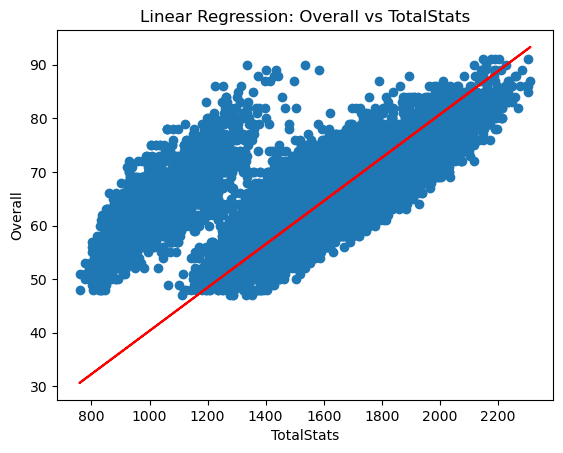

Hypothesis testing for coefficient:
H0: The coefficient is zero (No relationship)
H1: The coefficient is not zero (There is a relationship)
p-value: 0.0
Conclusion: Reject the null hypothesis. There is a significant relationship.
------------------------------------------
Regression results for variable: BaseStats
                                 OLS Regression Results                                
Dep. Variable:                Overall   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          5.159e+06
Date:                Sat, 17 Jun 2023   Prob (F-statistic):                        0.00
Time:                        18:41:57   Log-Likelihood:                         -51825.
No. Observations:               18539   AIC:                                  1.037e+05
Df Residuals:                   18538   BIC:                        

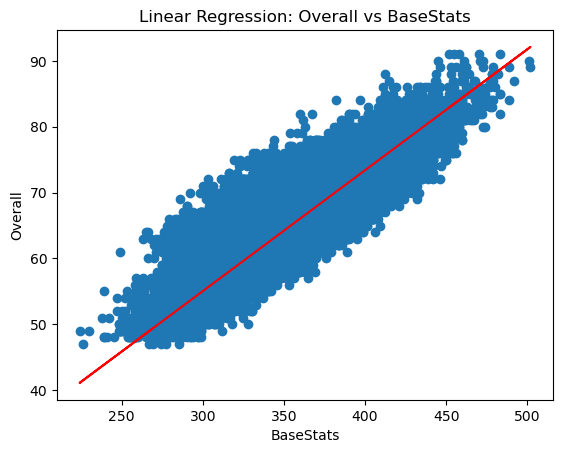

Hypothesis testing for coefficient:
H0: The coefficient is zero (No relationship)
H1: The coefficient is not zero (There is a relationship)
p-value: 0.0
Conclusion: Reject the null hypothesis. There is a significant relationship.
------------------------------------------


In [12]:
# Menentukan variabel dependen
dependent_variable = 'Overall'

# Melakukan regresi linear bertahap untuk setiap variabel
for feature in features:
    if feature != dependent_variable:
        # Menambahkan kolom konstanta untuk regresi
        data['Constant'] = 1
        
        # Inisialisasi model regresi linear bertahap
        model = sm.OLS(data[dependent_variable], data[feature])
        
        # Melakukan regresi linear bertahap
        results = model.fit()
        
        # Menampilkan hasil summary model regresi
        print("Regression results for variable:", feature)
        print(results.summary())
        print("------------------------------------------")
        
        # Plot regresi linear
        plt.figure()
        plt.scatter(data[feature], data[dependent_variable])
        plt.plot(data[feature], results.predict(), color='red')
        plt.xlabel(feature)
        plt.ylabel(dependent_variable)
        plt.title(f"Linear Regression: {dependent_variable} vs {feature}")
        plt.show()

         # Menampilkan hipotesis koefisien regresi
        print("Hypothesis testing for coefficient:")
        print("H0: The coefficient is zero (No relationship)")
        print("H1: The coefficient is not zero (There is a relationship)")
        print("p-value:", results.pvalues[feature])
        if results.pvalues[feature] < 0.05:
            print("Conclusion: Reject the null hypothesis. There is a significant relationship.")
        else:
            print("Conclusion: Fail to reject the null hypothesis. There is no significant relationship.")
        print("------------------------------------------")